<a href="https://colab.research.google.com/github/VeereshElango/vs3-cnn-labs/blob/main/FastAI_Vision_HighLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%capture
# FOR COLAB: uncomment and run the following code every time you are starting the session
!pip install kornia
!pip install timm

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
import torch
torch.set_num_threads(1)
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
import kornia as K
from tqdm import tqdm_notebook as tqdm
from time import time

def imshow_torch(tensor,figsize=(8,6), *kwargs):
    plt.figure(figsize=figsize)
    plt.imshow(K.tensor_to_image(tensor), *kwargs)
    return

def imshow_torch_channels(tensor, dim = 1, *kwargs):
    num_ch = tensor.size(dim)
    fig=plt.figure(figsize=(num_ch*5,5))
    tensor_splitted = torch.split(tensor, 1, dim=dim)
    for i in range(num_ch):
        fig.add_subplot(1, num_ch, i+1)
        plt.imshow(K.tensor_to_image(tensor_splitted[i].squeeze(dim)), *kwargs)
    return

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from fastai.vision.all import *

In [5]:
path = "/content/drive/MyDrive/Vs3ClassificationTaskDataset"

In [6]:
files = get_image_files(path)

In [24]:
def label_func(f): 
    return str(f).split("/")[5]

In [25]:
dls = ImageDataLoaders.from_path_func(path, files, label_func, item_tfms=Resize(224))

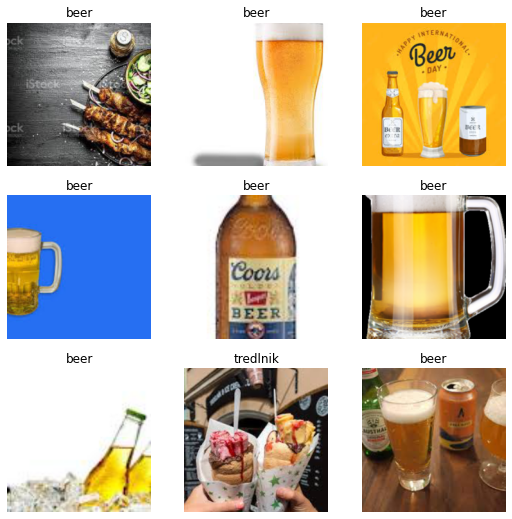

In [26]:
dls.show_batch()

In [27]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.026892,0.324256,0.129032,02:35


epoch,train_loss,valid_loss,error_rate,time
0,0.519361,0.263839,0.112903,01:43
1,0.385840,0.235079,0.080645,01:41
2,0.292670,0.326838,0.080645,01:41
3,0.225981,0.337831,0.064516,01:41
4,0.187251,0.295003,0.064516,01:44


In [28]:
preds, y, losses = learn.get_preds(with_loss=True)

interp = ClassificationInterpretation.from_learner(learn)

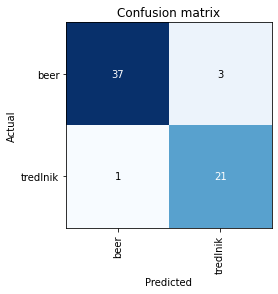

In [29]:
interp.plot_confusion_matrix()